In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from davood_ml_functions import *
import geopandas as gpd
# from warnings import filterwarnings
# filterwarnings("ignore")

In [36]:
# read the clean dataframe
path = r"C:\Users\Davood\Desktop\Bootcamp\DivarEstate\clean_data.csv"
df = pd.read_csv(path , index_col = 0)

In [37]:
lux_options = ["has_barbecue" , "has_pool" , "has_jacuzzi" , "has_sauna"]
location = ["location_latitude" , "location_longitude"]

In [38]:
# extract required columns
df = df.loc[:,lux_options + location]
df = df.rename(columns={"location_latitude" : "lat",
                   "location_longitude" : "long"})
df.head(3)

,has_barbecue,has_pool,has_jacuzzi,has_sauna,lat,long
1,False,False,False,False,35.773029,51.442308
2,False,False,False,False,35.703865,51.373459
3,False,False,False,False,35.784265,51.425872


In [39]:
# add a column that indicate a house is luxury
df["is_lux"] = df.loc[: , lux_options].sum(axis = 1)
df = df.loc[df["is_lux"] == True]
# drop unnecessary columns
df = df.drop(columns = lux_options + ["is_lux"])

In [40]:
# eliminate points outside iran borders 
# load borders
iran = gpd.read_file(r"C:\Users\Davood\Desktop\Bootcamp\DivarEstate\Section_01_Statistics\Descriptive_Statistics\ir_states_boundaries_coordinates.geojson")
# # dissolve Iran borders into one polygon
iran_union = iran.dissolve()
# filter loc by keeping only points inside Iran
df = df[gpd.points_from_xy(df['long'], df['lat']).within(iran_union.geometry.iloc[0])]

In [41]:
# convert loc to geoDataFrame
gdf_points = gpd.GeoDataFrame(
    df,
    geometry = gpd.points_from_xy(df['long'], df['lat']),
    crs = "EPSG:4326")

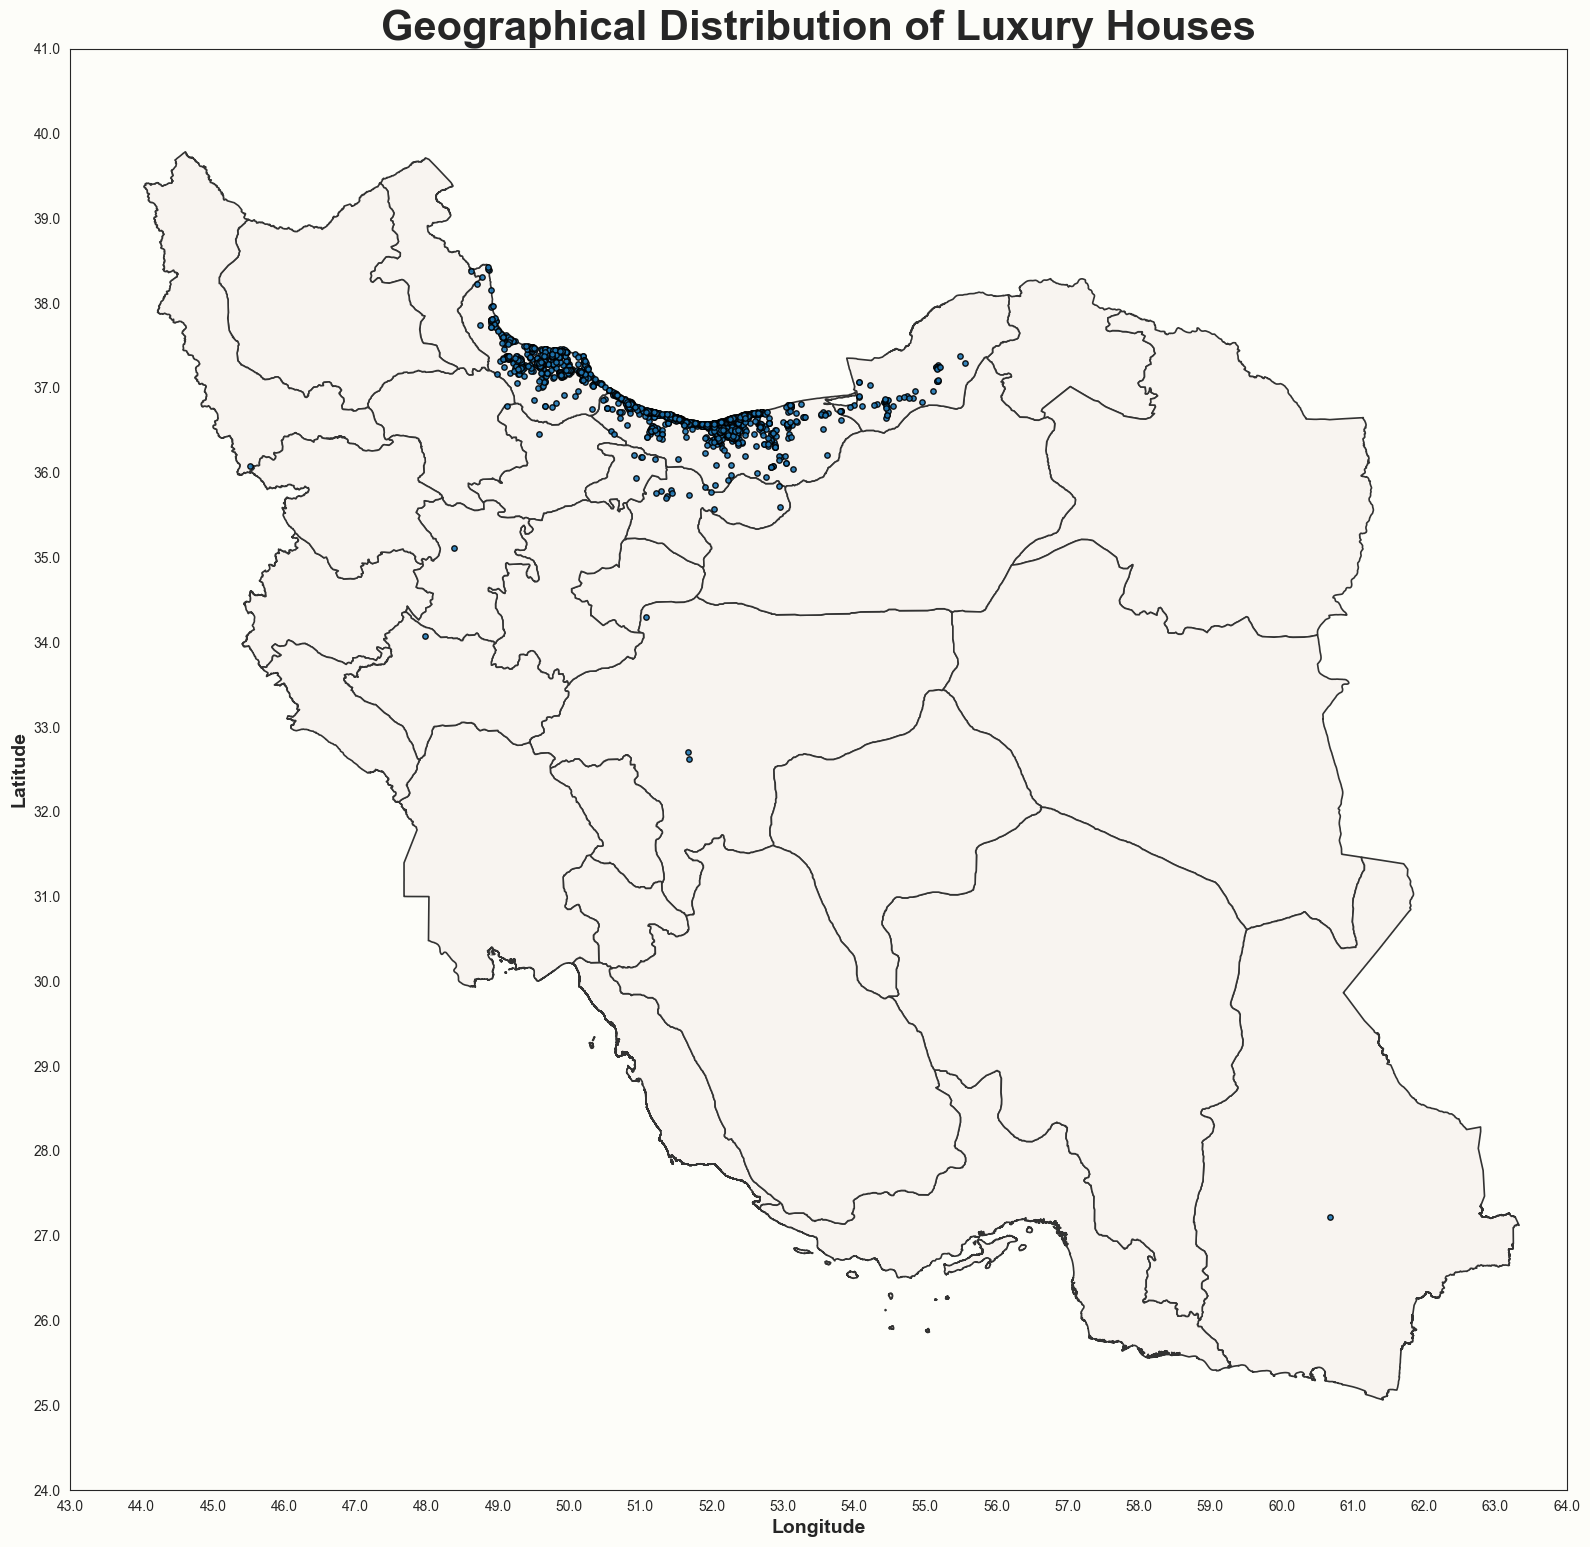

In [42]:
# initialize
sbn.set_style("white")
fig , ax = plt.subplots(figsize = (16 , 20))
fig.set_facecolor("#fdfdf9")
ax.set_facecolor("#fdfdf9")

# plot the borders
iran.plot(ax = ax , color = "#f8f4f0", edgecolor = "#333333", linewidth = 1.2)

# plot the points
gdf_points.plot(
    ax = ax,
    marker = "o",
    legend = True,
    markersize = 15,
    alpha = 0.9,
    edgecolor = "black")

# titles, etc.
ax.set_axis_off()
plt.title("Geographical Distribution of Luxury Houses", fontsize = 30 , weight = "bold")
ax.set_axis_on()
ax.set_xlabel("Longitude" , fontsize = 14 , weight = "bold")
ax.set_ylabel("Latitude" , fontsize = 14 , weight = "bold")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , _: f"{x:.1f}"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y , _: f"{y:.1f}"))
ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.set_xbound(43 , 64)
ax.set_ybound(24 , 41)

# save and show
fig.savefig("luxury_houses_distribution.png" , dpi = 200)
plt.tight_layout()
plt.show()